# 07C. Turing instability

### Mingyang Lu

### 3/11/2024

# Reaction-diffusion equations for a two-component systemFor a two-component system of $u$ and $v$, the reaction-diffusion equations are\begin{equation}\begin{aligned}\frac{\partial u(X,t)}{\partial t} = f(u,v,t) + D_u \frac{\partial^2 u(X,t)}{\partial X^2} \\\frac{\partial v(X,t)}{\partial t} = g(u,v,t) + D_v \frac{\partial^2 v(X,t)}{\partial X^2} \\\end{aligned} \tag{1}\end{equation}We generalize the previous PDE integrator for a two-component system. Here, we choose to use a periodic boundary condition by setting the state variables at the boundary points the same. For grid points ${X_i}$ for $i = 1,2 ...n$, we set $X_0 = X_n$ and $X_{n+1} = X_1$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## PDE integration with the finite difference method for a generic reaction-diffusion system (multi-variable)
def pde_fd_reaction_diffusion_multi(derivs, n, ngrid, dX, dt, D, t0, t_total, p0, **kwargs):
    """
    Parameters:
    # derivs: derivative function
    # n: number of components
    # ngrid: number of grid points
    # dX: X step size
    # dt: time step size
    # D: diffusion constant (a vector of n)
    # t0: initial time
    # t_total: total simulation time
    # p0: initial condition: a matrix of (n, ngrid)
    # **kwargs: additional keyworded arguments to the derivative function
    
    Returns:
    - p: Final values of P(X, t)
    """
    t_all = np.arange(t0, t_total + dt, dt)
    nt_all = len(t_all)
    factor = D / (dX ** 2) * dt
    p = p0.copy()

    for i in range(nt_all - 1):
        p_plus_one = np.roll(p, -1, axis=1)  # P(X+dX) for all Xs, periodic boundary condition
        p_minus_one = np.roll(p, 1, axis=1)  # P(X-dX) for all Xs, periodic boundary condition
        f = np.array([derivs(t_all[i], p[:, j], **kwargs) for j in range(ngrid)]).T
        # compute derivs for all grid points and save to f, a matrix of (n, ngrid)

        p = p + f * dt + factor[:, np.newaxis] * (p_plus_one + p_minus_one - 2 * p)  # finite difference to update all P(X,t)
        # above is a special usage of element-wise multiplication
    
    return p

# Turing instabilityFor a two-component dynamical system with a stable steady state, the system can become unstable when considering the molecular diffusion in space. Thus an instability can allow pattern formations. This phenomenon is called Turing instability. There are two classes of such two-component systems, one being the substrate-depletion model and the other being the activator-inhibitor model. In the following, we will illustrate both cases with the [Gierer-Meinhardt model](http://www.scholarpedia.org/article/Gierer-Meinhardt_model).## A substrate depletion modelThe model follows Equation (1), where $D_u =d$, $D_v = 1$, and\begin{equation}\begin{aligned}f(u,v,t) &= u^2v-u \\g(u,v,t) &= \mu (1-u^2v) \\\end{aligned} \tag{2}\end{equation}Here, $v$ serves as a substrate that activates $u$, and, by doing so, $v$ is in turn depleted by $u$.The model has two parameters $d$ and $\mu$. When $d = 0.1$ and $\mu = 1.5$, the system generates patterns. Pattern formation occurs for the situation of faster $v$ diffusion and large $\mu$.

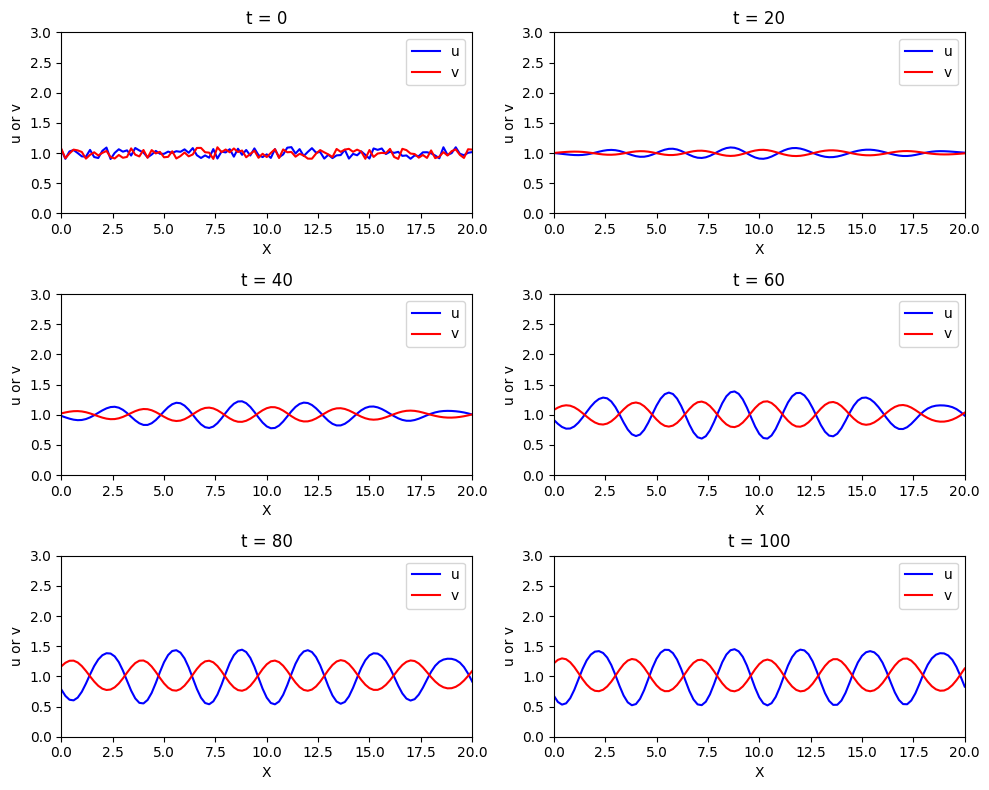

In [2]:
np.random.seed(10)

n = 2
l = 20
dX = 0.2
dt = 0.01
t_total_iter = 20
D = np.array([0.1, 1])
mu = 1.5

ngrid = int(l / dX) + 1  # number of grid points
X_all = np.arange(0, ngrid) * dX  # X values for each grid point

u0 = 1 + np.random.uniform(-0.1, 0.1, (n, ngrid))

def turing_asdm(t, p, mu):
    u = p[0]
    v = p[1]
    u2v = u * u * v
    f = u2v - u
    g = mu * (1 - u2v)
    return np.array([f, g])

# Define the layout
rows = 3
cols = 2
nt = 6

fig, axs = plt.subplots(rows, cols, figsize=(10, 8))
ind = 0
u_1 = u0.copy()
for i in range(rows):
    for j in range(cols):
        if ind > 0:
            u_1 = pde_fd_reaction_diffusion_multi(derivs = turing_asdm, n = n, ngrid = ngrid, 
                                          dX = dX, dt = dt, D = D, t0 = 0, t_total = t_total_iter, 
                                          p0 = u_1, mu = mu)
        if ind < nt:
            axs[i, j].plot(X_all, u_1[0], 'b-', label='u')
            axs[i, j].plot(X_all, u_1[1], 'r-', label='v')
            axs[i, j].set_xlabel('X')
            axs[i, j].set_ylabel('u or v')
            axs[i, j].set_xlim(0, 20)
            axs[i, j].set_ylim(0, 3)
            axs[i, j].set_title(f't = {ind * t_total_iter}')
            axs[i, j].legend()
            ind += 1
        else:
            axs[i, j].axis('off')  # Hide empty subplots

plt.tight_layout()
plt.show()

When $d = 0.8$ and $\mu = 1.5$, the system converges to a homogeneous distribution. Here, the difference in diffusion of $u$ and $v$ is very small.

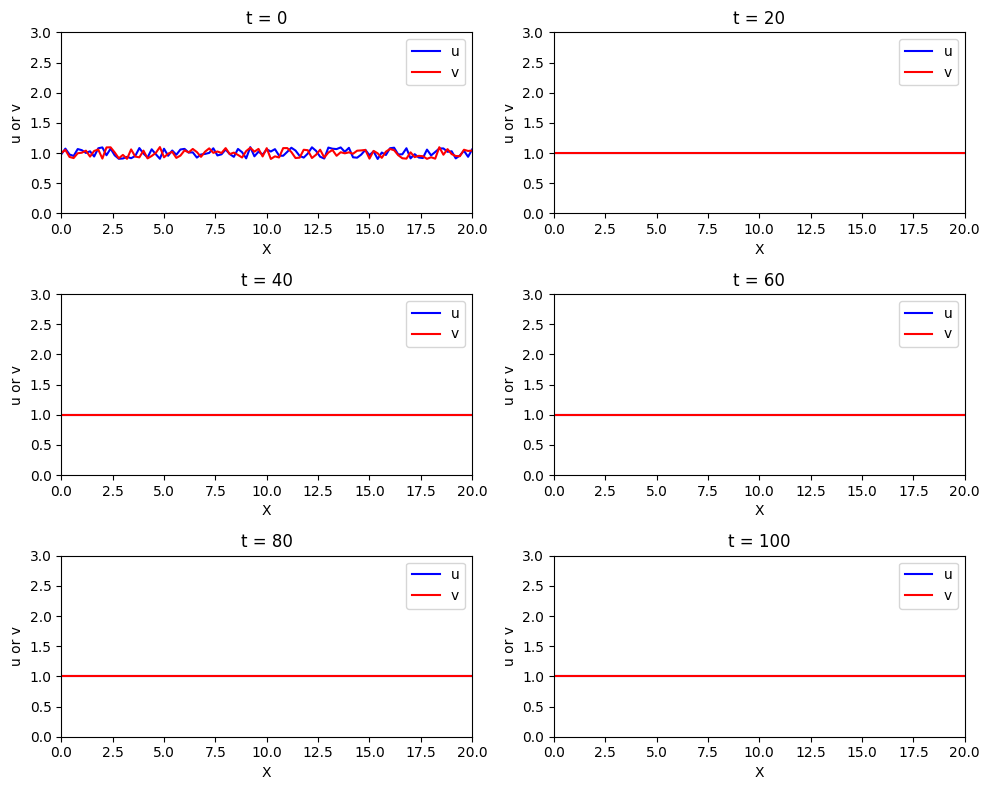

In [3]:
D = np.array([0.8, 1])
mu = 1.5
t_total_iter = 20

u0 = 1 + np.random.uniform(-0.1, 0.1, (n, ngrid))

# Define the layout
rows = 3
cols = 2
nt = 6

fig, axs = plt.subplots(rows, cols, figsize=(10, 8))
ind = 0
u_1 = u0.copy()
for i in range(rows):
    for j in range(cols):
        if ind > 0:
            u_1 = pde_fd_reaction_diffusion_multi(derivs = turing_asdm, n = n, ngrid = ngrid, 
                                          dX = dX, dt = dt, D = D, t0 = 0, t_total = t_total_iter, 
                                          p0 = u_1, mu = mu)
        if ind < nt:
            axs[i, j].plot(X_all, u_1[0], 'b-', label='u')
            axs[i, j].plot(X_all, u_1[1], 'r-', label='v')
            axs[i, j].set_xlabel('X')
            axs[i, j].set_ylabel('u or v')
            axs[i, j].set_xlim(0, 20)
            axs[i, j].set_ylim(0, 3)
            axs[i, j].set_title(f't = {ind * t_total_iter}')
            axs[i, j].legend()
            ind += 1
        else:
            axs[i, j].axis('off')  # Hide empty subplots

plt.tight_layout()
plt.show()

When $d = 0.3$ and $\mu = 0.9$, the system can oscillate over time, but for each time point both $u$ and $v$ are constant in space. 

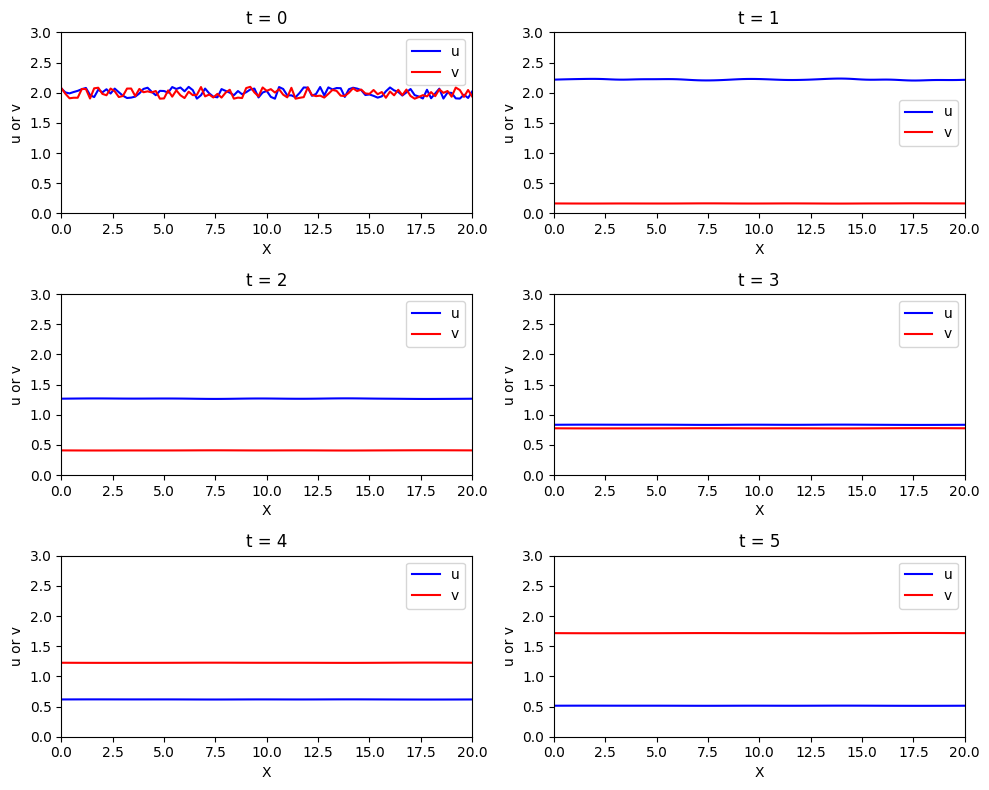

In [4]:
D = np.array([0.3, 1])
mu = 0.9
t_total_iter = 1

u0 = 2 + np.random.uniform(-0.1, 0.1, (n, ngrid)) # slightly different initial P

# Define the layout
rows = 3
cols = 2
nt = 6

fig, axs = plt.subplots(rows, cols, figsize=(10, 8))
ind = 0
u_1 = u0.copy()
for i in range(rows):
    for j in range(cols):
        if ind > 0:
            u_1 = pde_fd_reaction_diffusion_multi(derivs = turing_asdm, n = n, ngrid = ngrid, 
                                          dX = dX, dt = dt, D = D, t0 = 0, t_total = t_total_iter, 
                                          p0 = u_1, mu = mu)
        if ind < nt:
            axs[i, j].plot(X_all, u_1[0], 'b-', label='u')
            axs[i, j].plot(X_all, u_1[1], 'r-', label='v')
            axs[i, j].set_xlabel('X')
            axs[i, j].set_ylabel('u or v')
            axs[i, j].set_xlim(0, 20)
            axs[i, j].set_ylim(0, 3)
            axs[i, j].set_title(f't = {ind * t_total_iter}')
            axs[i, j].legend()
            ind += 1
        else:
            axs[i, j].axis('off')  # Hide empty subplots

plt.tight_layout()
plt.show()

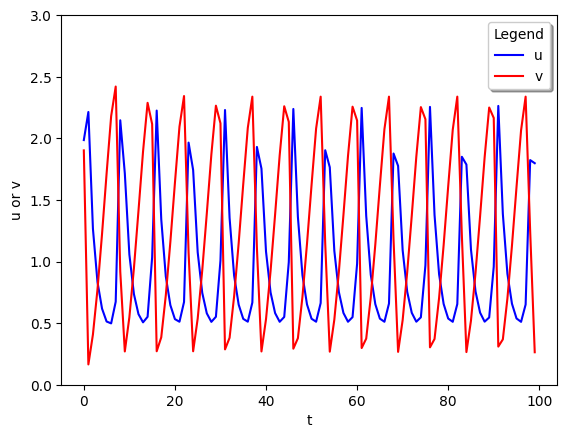

In [5]:
# Longer simulations to check u(t) and v(t)
D = np.array([0.3, 1])
mu = 0.9
t_total_iter = 1
niter = 100 # total number of iterations

u0 = 2 + np.random.uniform(-0.1, 0.1, (n, ngrid)) # slightly different initial P
traj_u = np.zeros((niter, 3)) # save u & v over longer time

u_1 = u0.copy()
for i in range(100):
    if i > 0:
        u_1 = pde_fd_reaction_diffusion_multi(derivs = turing_asdm, n = n, ngrid = ngrid, 
                                      dX = dX, dt = dt, D = D, t0 = 0, t_total = t_total_iter, 
                                      p0 = u_1, mu = mu)
    traj_u[i, 0] = i * t_total_iter
    traj_u[i, 1:] = u_1[:, ngrid//2]

plt.plot(traj_u[:, 0], traj_u[:, 1], color='blue', label='u')
plt.plot(traj_u[:, 0], traj_u[:, 2], color='red', label='v')
plt.xlabel('t')
plt.ylabel('u or v')
plt.ylim(0, 3)
plt.legend(loc='upper right', title='Legend', fancybox=True, shadow=True, fontsize='medium')
plt.show()

## An activator-inhibitor model

Lastly, we consider another type of Turing instability -- an activator-inhibitor model:

The model also follows Equation (1), where $D_u =d$, $D_v = 1$, and

\begin{equation}
\begin{aligned}
f(u,v,t) &= u^2/v-u \\
g(u,v,t) &= \mu (u^2 - v) \\
\end{aligned} \tag{3}
\end{equation}

Here, $u$ serves as an activator, and $v$ as an inhibitor. The activator can activate itself and the inhibitor, while the inhibitor can suppress both. Similar to the previous model, $v$ diffuses much faster than $u$ (*a.k.a*, self enhancement and long-range inhibition). 

There are also two parameters $d$ and $\mu$. When $d = 0.1$ and $\mu = 1.5$, the system generates patterns too. Here, $u$ and $v$ are synchronized in space. 

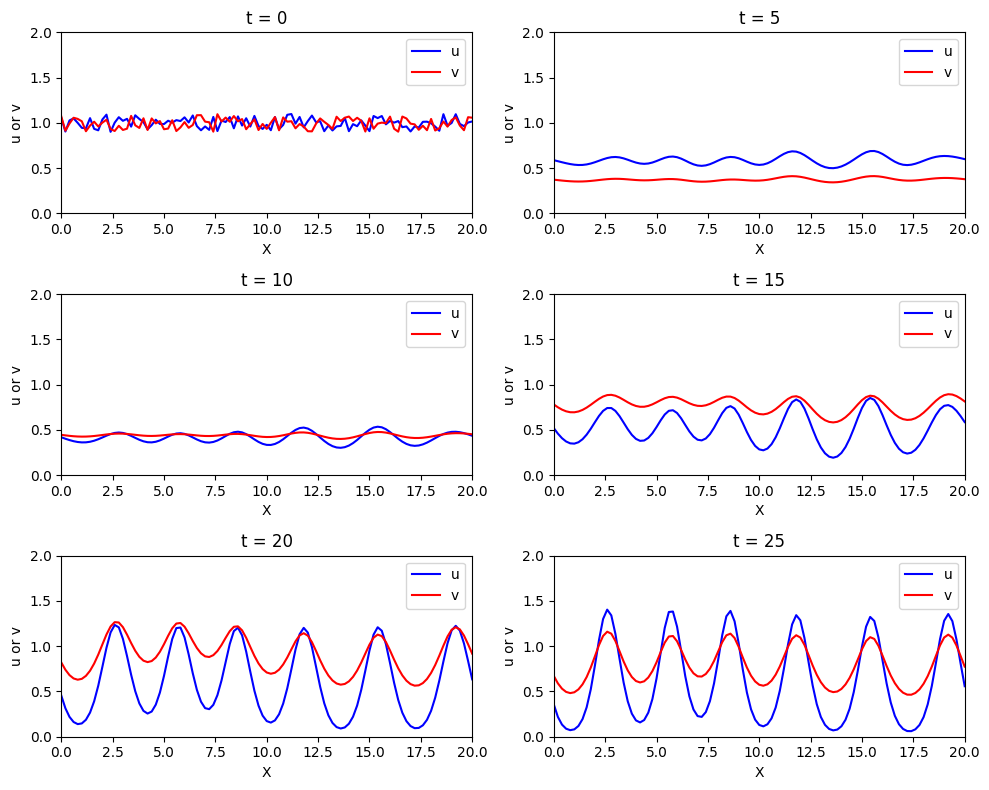

In [6]:
np.random.seed(10)

n = 2
l = 20
dX = 0.2
dt = 0.01
t_total_iter = 5
D = np.array([0.1, 1])
mu = 1.5

ngrid = int(l / dX) + 1  # number of grid points
X_all = np.arange(0, ngrid) * dX  # X values for each grid point

u0 = 1 + np.random.uniform(-0.1, 0.1, (n, ngrid))

def turing_asdm(t, p, mu):
    u = p[0]
    v = p[1]
    f = u**2/v - u
    g = mu*u**2 - v
    return np.array([f, g])

# Define the layout
rows = 3
cols = 2
nt = 6

fig, axs = plt.subplots(rows, cols, figsize=(10, 8))
ind = 0
u_1 = u0.copy()
for i in range(rows):
    for j in range(cols):
        if ind > 0:
            u_1 = pde_fd_reaction_diffusion_multi(derivs = turing_asdm, n = n, ngrid = ngrid, 
                                          dX = dX, dt = dt, D = D, t0 = 0, t_total = t_total_iter, 
                                          p0 = u_1, mu = mu)
        if ind < nt:
            axs[i, j].plot(X_all, u_1[0], 'b-', label='u')
            axs[i, j].plot(X_all, u_1[1], 'r-', label='v')
            axs[i, j].set_xlabel('X')
            axs[i, j].set_ylabel('u or v')
            axs[i, j].set_xlim(0, 20)
            axs[i, j].set_ylim(0, 2)
            axs[i, j].set_title(f't = {ind * t_total_iter}')
            axs[i, j].legend()
            ind += 1
        else:
            axs[i, j].axis('off')  # Hide empty subplots

plt.tight_layout()
plt.show()